# Installation of Packages

In [1]:

# !pip install -q keras_cv
# !pip install -q keras_hub


# Download Dataset from external source

# Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import  metrics
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras import callbacks
from tensorflow.keras import ops
from tensorflow.keras import regularizers
from tensorflow.keras import applications
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import pathlib

import tensorflow_hub as hub


import datetime
import zipfile
import shutil 
from warnings import filterwarnings
# import keras_cv
# import keras_hub

# Custom Functions

In [3]:
filterwarnings('ignore')

# Reading Data

In [4]:
def from_zip():
    dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
    path_to_zip = utils.get_file('flower_photos.tgz', origin=dataset_url, extract=True, )
    data_dir = pathlib.Path(path_to_zip).with_suffix('')
    return os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')


def from_kaggle_zip():
    
    if os.path.exists('./dataset'):
        shutil.rmtree('./dataset')

    
    DATA_PATH = '/kaggle/input/dogs-vs-cats-redux-kernels-edition/'
    with zipfile.ZipFile(os.path.join(DATA_PATH, "train.zip"),"r") as z:
        z.extractall("./dataset")
        #file_list = z.namelist()
    with zipfile.ZipFile(os.path.join(DATA_PATH, "test.zip"),"r") as z:
        z.extractall("./dataset")
        file_list = z.namelist()
    
    
    os.makedirs('./dataset/training', exist_ok=True)
    
    folders = ['cat', 'dog']
    
    for folder in folders:
        os.makedirs(os.path.join('./dataset/training', folder), exist_ok=True)
    
    for file_name in os.listdir('./dataset/train'):
        pet = file_name.split('.')[-3]
        id = file_name.split('.')[-2] +'.'+ file_name.split('.')[-1]
          
        
        if pet == 'cat':
             shutil.move(os.path.join('./dataset/train', file_name), os.path.join('./dataset/training/cat', id))
        elif pet == 'dog':
             shutil.move(os.path.join('./dataset/train', file_name), os.path.join('./dataset/training/dog', id))
    
    
    shutil.rmtree('./dataset/train')
    os.rename('./dataset/training', './dataset/train')
    print(os.listdir('./dataset'))
    return  './dataset'


def from_kaggle():
    return '/kaggle/input/brain-tumor-classification-mri'
     
    

In [5]:
#PATH =  from_zip()
#PATH = from_kaggle_zip()
PATH = from_kaggle()

print(PATH)

/kaggle/input/brain-tumor-classification-mri


In [6]:
train_dir = os.path.join(PATH, 'Training')
#validation_dir = os.path.join(PATH, 'Validation')
test_dir = os.path.join(PATH, 'Testing')
 

In [7]:
batch_size = 32
img_height = 150
img_width = 150

In [8]:
print(os.listdir(train_dir))

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [9]:
train_ds = utils.image_dataset_from_directory(
  train_dir,
  shuffle=True,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 2870 files belonging to 4 classes.
Using 2296 files for training.


In [10]:
val_ds = utils.image_dataset_from_directory(
  train_dir,
  shuffle=True,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [11]:
test_ds = utils.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

Found 394 files belonging to 4 classes.


# Data Inspection

In [12]:
print(train_ds)
print(val_ds)
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [13]:
category = train_ds.class_names
category

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

 # Data Visualization

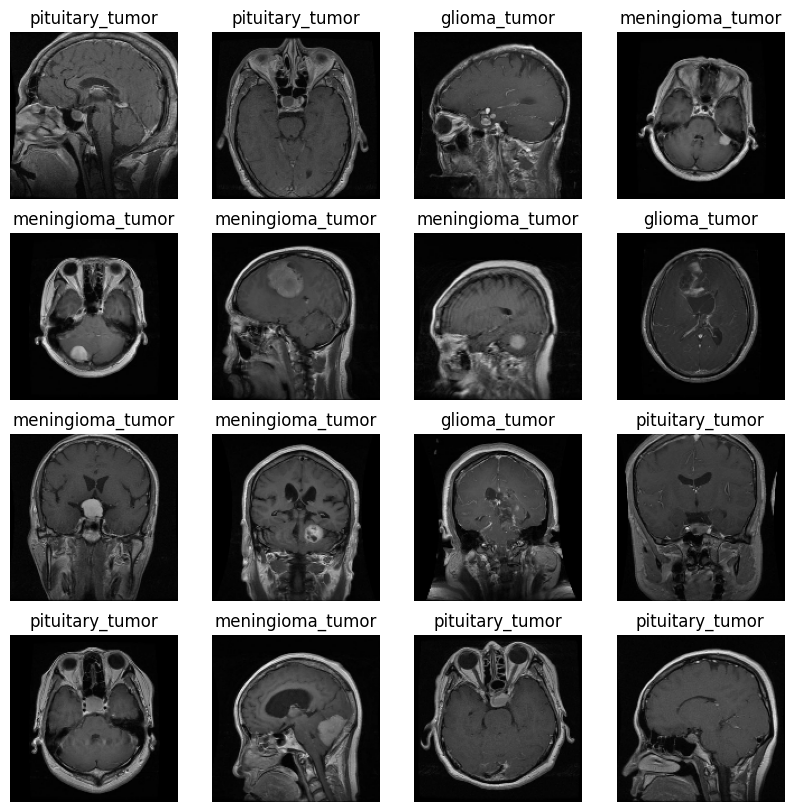

In [14]:
def view_data():
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
      for i, item in enumerate(np.random.choice(100, 16)):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(category[labels[i]])
        plt.axis("off")

view_data()

# Data Preprocessing

In [15]:
def add_testing_data():
    val_batches = tf.data.experimental.cardinality(val_ds) 
    test_ds = val_ds.take(val_batches // 5)
    val_ds = val_ds.skip(val_batches // 5)

    print('Number of training batches: %d' % tf.data.experimental.cardinality(train_ds))
    print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
    print('Number of testing batches: %d' % tf.data.experimental.cardinality(test_ds))

# If test data is not available
#add_testing_data()  

In [16]:
print(train_ds)
print(val_ds)
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [18]:
train_data_augmentation = models.Sequential(
    [

        layers.Rescaling(scale=1.0 / 255.0),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="train_data_augmentation",
)

val_data_augmentation = models.Sequential(
    [

        layers.Rescaling(scale=1.0 / 255.0),
    ],
    name="val_data_augmentation",
)

In [19]:
train_ds = train_ds.map(lambda x, y: (train_data_augmentation(x), y))
val_ds = val_ds.map(lambda x, y: (val_data_augmentation(x), y))
test_ds = test_ds.map(lambda x, y: (val_data_augmentation(x), y))

# Data Postprocessing

In [20]:
train_ds,  val_ds, test_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Model

###### **Custom Model**

In [21]:
def custom_model(input_shape, num_classes):
    model = models.Sequential([
      layers.Input(shape=input_shape),
      layers.Conv2D(16, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(32, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Conv2D(64, 3, padding='same', activation='relu'),
      layers.MaxPooling2D(),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(num_classes)
    ])
    return model

###### **Pretrained Model**

In [22]:
def pretrained_model(input_shape, num_classes):
    model = applications.EfficientNetB0(
        include_top=True,
        weights=None,
        classes=num_classes,
        input_shape=input_shape,
        )


    return model

###### **Transfer Learning Model**

In [23]:
def transfer_model(input_shape, num_classes):

    #inputs = layers.Input(shape=input_shape)
    
    base_model = applications.EfficientNetB0(weights='imagenet',
                                       include_top=False, input_shape=input_shape )
     
    #base_model.trainable = False


    x = base_model.output
    
     

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    
    outputs = layers.Dense(num_classes,activation='softmax')(x)

    return models.Model(base_model.input, outputs)

 

###### **Tensor Hub**

In [24]:
#feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

#feature_extractor_layer = hub.KerasLayer(feature_extractor_model,input_shape=(224, 224, 3), trainable=False)

# def hub_model(input_shape, num_classes):
#     model = models.Sequential([
#       feature_extractor_layer,
#       layers.Dense(num_classes)
#     ])
#     return model

##### **Usage**

In [25]:
input_shape = (img_height, img_width, 3)
NUM_CLASSES = len(category)
input_shape, NUM_CLASSES

((150, 150, 3), 4)

In [26]:
#model = custom_model(input_shape=input_shape, num_classes=NUM_CLASSES)
#model = pretrained_model(input_shape=input_shape, num_classes=NUM_CLASSES)
model = transfer_model(input_shape=input_shape, num_classes=NUM_CLASSES)
#model = hub_model(input_shape=input_shape, num_classes=NUM_CLASSES)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
# utils.plot_model(model, show_shapes=True)
#model.summary()

# Compile

In [28]:
def run_experiment(cmodel, epochs=1):
    # Use from_logits=False if your model already applies softmax.
    # Use from_logits=True if the model provides raw logits.
    
    cmodel.compile(optimizer=optimizers.Adam(learning_rate=1e-2),
                  loss=losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=["accuracy"])




    # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    #           loss=tf.keras.losses.BinaryCrossentropy(),
    #           metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

    custom_callbacks = [
        callbacks.ModelCheckpoint("best_model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1),
        #callbacks.EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor='val_accuracy' , factor=0.3, patience=2,min_delta = 0.001, mode='auto', verbose=1),
        #callbacks.TensorBoard(log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),histogram_freq=1),
        callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    ]

    history = cmodel.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs,
      callbacks=custom_callbacks
    )

    evaluation = cmodel.evaluate(val_ds)

    return history, cmodel, evaluation, log_dir

# Fit

In [29]:
history, tmodel, evaluation, log_dir = run_experiment(model, epochs=20)

Epoch 1/20


I0000 00:00:1733696291.374383      98 service.cc:145] XLA service 0x7b581c02ca90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733696291.374441      98 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733696291.374445      98 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733696336.612664      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.5156 - loss: 1.3298
Epoch 1: val_accuracy improved from -inf to 0.28920, saving model to best_model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 147s 938ms/step - accuracy: 0.5169 - loss: 1.3259 - val_accuracy: 0.2892 - val_loss: 477.4471 - learning_rate: 0.0100
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7485 - loss: 0.6618
Epoch 2: val_accuracy did not improve from 0.28920
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.7486 - loss: 0.6619 - val_accuracy: 0.2892 - val_loss: 36.0993 - learning_rate: 0.0100
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7973 - loss: 0.5840
Epoch 3: val_accuracy did not improve from 0.28920

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
72/72 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.7975 - loss: 0.5835 - val_accuracy: 0.1394 - val_loss: 11.7747 - learning_rate: 0.0100
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - acc

In [30]:

#%load_ext tensorboard
#%tensorboard --logdir .logs/fit

# Evaluation

In [31]:
test_loss, test_acc = evaluation
print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2f}")

Test loss: 0.30
Test accuracy: 0.90


In [41]:
def get_metrics(model):
    data = test_ds
    predictions = model.predict(data)
    pred_labels = tf.argmax(predictions, axis=-1)
    true_labels = tf.concat([label for _, label in data], axis=0)
    target_names = ["Class {}:".format(i) for i in range(NUM_CLASSES)]
    print(classification_report(true_labels, pred_labels, target_names=target_names))

    return pred_labels, true_labels
    
pred_labels, true_labels = get_metrics(tmodel)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step
              precision    recall  f1-score   support

    Class 0:       0.18      0.03      0.05       100
    Class 1:       0.24      0.30      0.26       115
    Class 2:       0.23      0.34      0.28       105
    Class 3:       0.23      0.24      0.24        74

    accuracy                           0.23       394
   macro avg       0.22      0.23      0.21       394
weighted avg       0.22      0.23      0.21       394



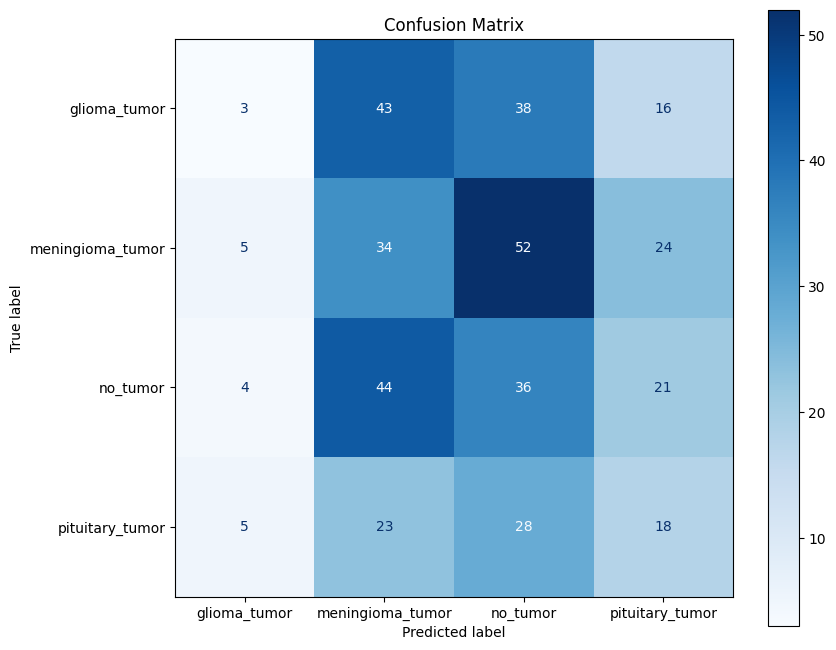

In [42]:
def get_confusion_matrix(pred_labels, true_labels):
    fig, ax = plt.subplots(figsize=(9, 8)) 
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category)
    disp.plot(cmap=plt.cm.Blues, ax=ax,)
    plt.title("Confusion Matrix")
    plt.show()

get_confusion_matrix(pred_labels, true_labels )

 

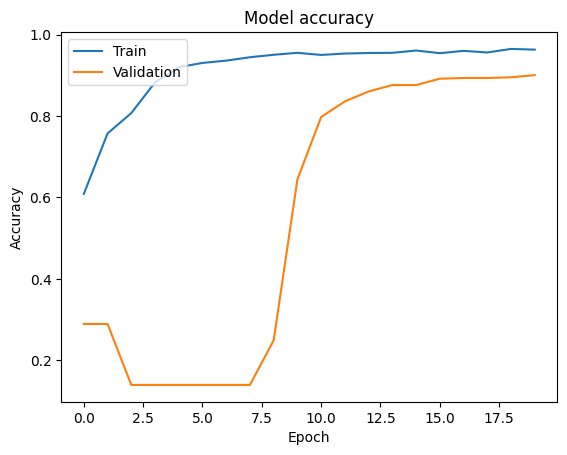

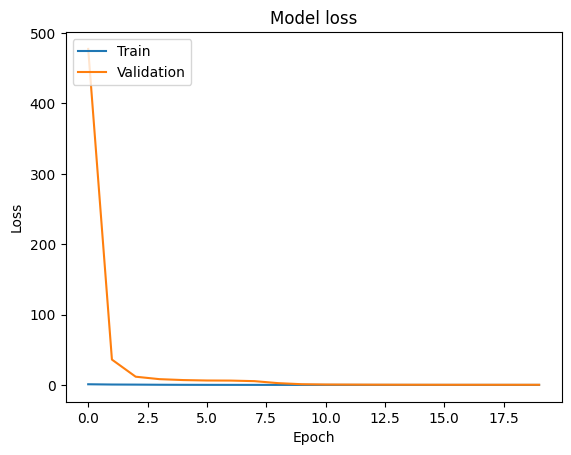

In [43]:
def make_plot(metric):
  plt.plot(history.history[metric ])
  plt.plot(history.history['val_'+metric ])
  plt.title( 'Model '+metric )
  plt.ylabel( metric.capitalize() )
  plt.xlabel( 'Epoch' )
  plt.legend([ 'Train' , 'Validation' ], loc='upper left' )
  plt.show()

make_plot('accuracy')
make_plot('loss')

# Inference

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
This image most likely belongs to meningioma_tumor with a 47.54 percent confidence.


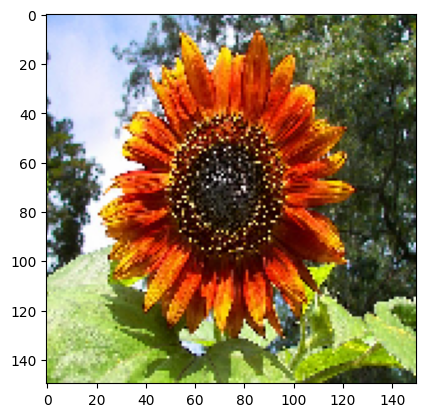

In [35]:
def infer(url):
     
    sunflower_path = utils.get_file('Red_sunflower', origin=url)
    
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    plt.imshow(img)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(category[np.argmax(score)], 100 * np.max(score))
    )

infer(
    url='https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg'
)

# Deploy

In [36]:
#t = datetime.time()

export_path = "/tmp/saved_models/{}".format(int('12'))
export_path

'/tmp/saved_models/12'

In [37]:
def save_model(model):
    model.save(export_path)

# save_model(model)

In [38]:
def loading_model(export_path):

    reloaded = tf.keras.models.load_model(export_path)
    
     
    reloaded_result_batch = reloaded.predict(image_batch)
    
    reloaded_predicted_id = tf.math.argmax(reloaded_result_batch, axis=-1)
    reloaded_predicted_label_batch = categories[reloaded_predicted_id]
    print(reloaded_predicted_label_batch)

#loading_model()

In [39]:
def to_lite():
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    
    with open('model.tflite', 'wb') as f:
      f.write(tflite_model)

    TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

    interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

    interpreter.get_signature_list()

    classify_lite = interpreter.get_signature_runner('serving_default')
     
    
    predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
    score_lite = tf.nn.softmax(predictions_lite)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(category[np.argmax(score_lite)], 100 * np.max(score_lite))
    )
    
    #print(np.max(np.abs(predictions - predictions_lite)))

#to_lite()

In [40]:
def to_submission():
    pred_list = []
    img_list = []
    for index, img  in enumerate(test_ds):
        img_data = img['image']
        
        data = img_data.reshape(-1,img_width,img_height,3)
        predicted = model.predict([data])[0]
        img_list.append(index)
        pred_list.append(predicted[1])
    
    
    submission = pd.DataFrame({'id':img_list , 'label':pred_list})
    submission.head()
    submission.to_csv("./submission.csv", index=False)

#to_submission()